# 分类指标作业（第二题）

### 题目
给定完整数据集，分别计算在使用完整数据集的10%,30%,50%,80%,100%数据时的查准率、查全率，f1度量和ROC，使用折线图表现出这些指标的变化情况，并画出在不同数据量下的ROC曲线

### 加载数据集

In [7]:
import os
import random
def get_dataset():
    data = []
    for root, dirs, files in os.walk('../dataset/aclImdb/neg'):
        for file in files:
            realpath = os.path.join(root, file)
            with open(realpath, errors='ignore') as f:
                data.append((f.read(), 0))
    for root, dirs, files in os.walk(r'../dataset/aclImdb/pos'):
        for file in files:
            realpath = os.path.join(root, file)
            with open(realpath, errors='ignore') as f:
                data.append((f.read(), 1))
    random.shuffle(data)

    return data

In [8]:
data = get_dataset()
data[:2]

[('Unless you are between the ages of 10 and 14 (except for the R rating), there are very few things to like here. One or two lines from Kenan Thompson, David Koechner (we really should see him more) and Sam Jackson are humorous and Julianna Margulies is as good as she can be considering her surroundings, but sadly, that\'s it. Poor plot. Poor acting. Worse writing and delivery. The special effects are dismal. As much as the entire situation is an odd and awful joke, the significant individual embedded situations are all equally terrible. If we consider the action portions, well there are unbelievable action sequences in some films that make you giddy and there are some that make you groan. This movie only contains the latter kind. This leaves little left. I\'m so glad I did not pay for this.<br /><br />Despite any hype, I can read and think, so as I sat down to watch, I did not expect anything good. I had no expectations, but was somewhat worried going in. Yet, like a train wreck, one

### 按7：3划分数据集

In [9]:
def train_and_test_data(data_):
    filesize = int(0.7 * len(data_))
    # 训练集和测试集的比例为7:3
    train_data_ = [each[0] for each in data_[:filesize]]
    train_target_ = [each[1] for each in data_[:filesize]]

    test_data_ = [each[0] for each in data_[filesize:]]
    test_target_ = [each[1] for each in data_[filesize:]]

    return train_data_, train_target_, test_data_, test_target_

In [10]:
train_data, train_target, test_data, test_target = train_and_test_data(data)

### 定义分类器

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB

nbc = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB(alpha=1.0)),
])
nbc.fit(train_data, train_target)    #训练我们的多项式模型贝叶斯分类器
predict = nbc.predict(test_data)  #在测试集上预测结果
y_score = nbc.fit(train_data, train_target).predict_proba(test_data)
print(y_score)
count = 0                                      #统计预测正确的结果个数
for left , right in zip(predict, test_target):
      if left == right:
            count += 1
print(count/len(test_target))

[[0.51083071 0.48916929]
 [0.73102053 0.26897947]
 [0.30725664 0.69274336]
 ...
 [0.7051641  0.2948359 ]
 [0.95670055 0.04329945]
 [0.96212725 0.03787275]]
0.8618666666666667


[[0.52592994 0.47407006]
 [0.50514363 0.49485637]
 [0.38757784 0.61242216]
 ...
 [0.56621401 0.43378599]
 [0.35758914 0.64241086]
 [0.31767289 0.68232711]]
[[0.49465951 0.50534049]
 [0.70456524 0.29543476]
 [0.42657598 0.57342402]
 ...
 [0.49094946 0.50905054]
 [0.92783796 0.07216204]
 [0.8024358  0.1975642 ]]
[[0.49445208 0.50554792]
 [0.72624226 0.27375774]
 [0.35817261 0.64182739]
 ...
 [0.72512198 0.27487802]
 [0.95407643 0.04592357]
 [0.95014618 0.04985382]]
[[0.47846521 0.52153479]
 [0.74802248 0.25197752]
 [0.30833458 0.69166542]
 ...
 [0.7419486  0.2580514 ]
 [0.95732057 0.04267943]
 [0.95765587 0.04234413]]
[[0.51083071 0.48916929]
 [0.73102053 0.26897947]
 [0.30725664 0.69274336]
 ...
 [0.7051641  0.2948359 ]
 [0.95670055 0.04329945]
 [0.96212725 0.03787275]]


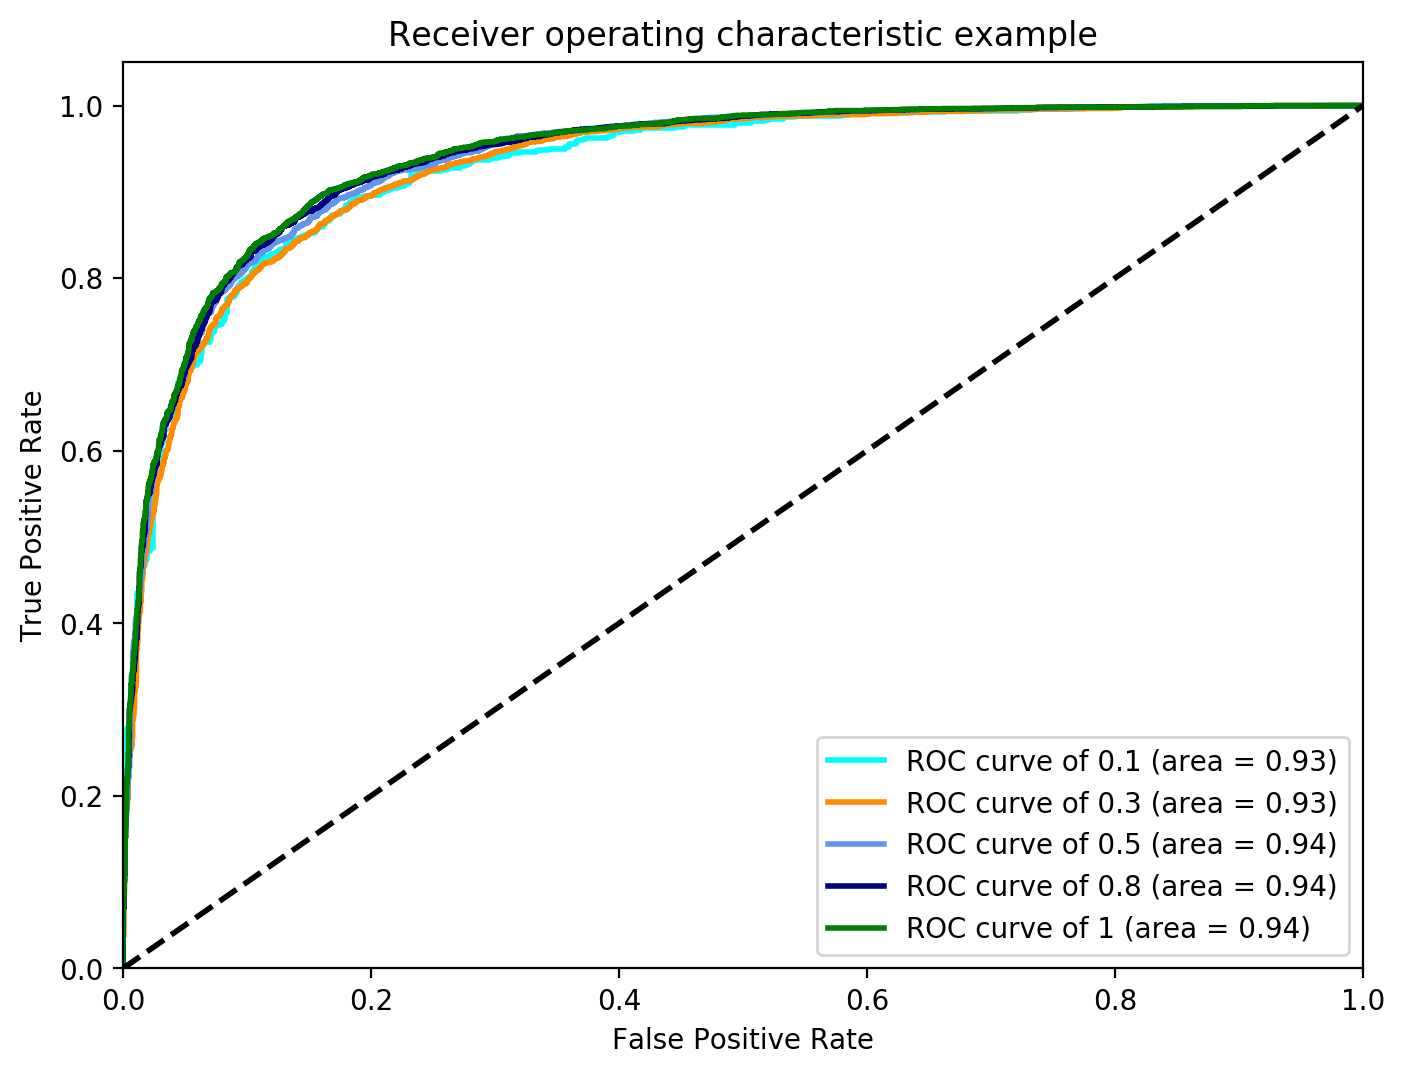

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

nbc = Pipeline([
    ('vect', TfidfVectorizer()),
    ('clf', MultinomialNB(alpha=1.0)),
])
fpr = []
tpr = []
roc_auc = []
for k, v in enumerate([0.1, 0.3, 0.5, 0.8, 1]):
    train_data_ = train_data[0: int(len(train_data)*v)]
    train_target_ = train_target[0: int(len(train_data)*v)]
    test_data_ = test_data[0: int(len(train_data)*v)]
    test_target_ = test_target[0: int(len(train_data)*v)]
    
    nbc.fit(train_data_, train_target_)
    predict = nbc.predict(test_data_)
    y_score = nbc.fit(train_data_, train_target_).predict_proba(test_data_)
    print(y_score)
    f, t , _ = roc_curve(test_target_, y_score[:, 1])
    fpr.append(f)
    tpr.append(t)
    roc_auc.append(auc(fpr[k], tpr[k]))

plt.figure(figsize=(8,6), dpi=200)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'navy', 'green'])
for i, color in zip(range(5), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format([0.1, 0.3, 0.5, 0.8, 1][i], roc_auc[i]))
    

plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
